아래와 같이 텍스트 파일을 읽어 옵니다.

In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [2]:
len(total_docs)

15

In [3]:
total_docs[0]

'Ryen Aleman was engrossed in the virtual world, focused on the video game in front of him, when he realized the gunshots he was hearing were real. He ducked and bolted for a restroom to take cover.\nAnother mass shooting was unfolding in Florida, this time at a tournament for competitive players of the football video game, Madden, in Jacksonville. The winners would go on to a higher level tournament in Las Vegas in October, where large cash prizes could be won.\nParticipants had gathered at the Jacksonville Landing Complex, an open-air marketplace with stores, bars and restaurants along the St. Johns River.\n\nDavid Katz, a 24-year-old gamer from Baltimore, Maryland, was in Jacksonville for the tournament at GLHF Game Bar, in the back of a pizza restaurant. On Sunday, he brought a gun into the venue and opened fire, killing two people. Then he turned the gun on himself, Jacksonville Sheriff Mike Williams said. Police have not released a possible motive.\nKatz used at least one handgun

In [4]:
import preprocessing # import a python file for English text preprocessing

In [5]:
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [6]:
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [7]:
print(docs_nouns[0]) # 첫번째 문서에 대한 내용 ((문서 내용, [명사단어])로 구성)

['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'time', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', 'p

In [8]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [10]:
DTM_TFIDF.shape

(15, 1166)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=10)
pca_results_tfidf = pca.fit_transform(DTM_TFIDF)

In [13]:
pca.explained_variance_ratio_

array([0.16995738, 0.15595055, 0.14023592, 0.10953876, 0.06273507,
       0.05587951, 0.04982095, 0.04679968, 0.04422534, 0.04143181])

In [14]:
sum(pca.explained_variance_ratio_)

0.8765749661517428

## KMeans 적용하기

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)

C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
clusters_pca_tfidf

array([4, 4, 4, 3, 3, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1])

## 실루엣 값 확인해 보기

In [18]:
from sklearn.metrics import silhouette_score
print(silhouette_score(pca_results_tfidf, clusters_pca_tfidf))

0.37140149068114886


In [19]:
kmeans1 = KMeans(n_clusters=5, random_state=42)
clusters_tfidf = kmeans1.fit_predict(DTM_TFIDF)

C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
clusters_tfidf

array([1, 1, 1, 4, 4, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0])

In [21]:
print(silhouette_score(DTM_TFIDF, clusters_tfidf))

0.24302353093870296


## 군집화 분석 결과 시각화 해보기

In [22]:
pca = PCA(n_components=2)
pca_results_tfidf = pca.fit_transform(DTM_TFIDF)

In [23]:
kmeans = KMeans(n_clusters=5)
clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)

C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
clusters_pca_tfidf

array([4, 4, 4, 1, 1, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2])

In [25]:
pca_results_tfidf 

array([[ 0.19982771,  0.04701672],
       [ 0.20549161,  0.05507015],
       [ 0.20755545,  0.02705401],
       [ 0.11772557,  0.23362833],
       [ 0.08628774,  0.26415688],
       [-0.2009714 ,  0.59103564],
       [-0.20674937,  0.52477829],
       [-0.21085471,  0.60602019],
       [-0.55060843, -0.4507377 ],
       [-0.37438507, -0.26401527],
       [-0.45002189, -0.36965388],
       [-0.51016097, -0.44450875],
       [ 0.57875257, -0.28901465],
       [ 0.53934503, -0.2541032 ],
       [ 0.56876616, -0.27672676]])

In [26]:
import pandas as pd

In [27]:
data = pd.DataFrame(pca_results_tfidf, columns=['x1', 'x2'])

In [28]:
data['cluster_id']=clusters_pca_tfidf.tolist()

In [29]:
data.head(3)

,x1,x2,cluster_id
0,0.199828,0.047017,4
1,0.205492,0.055070,4
2,0.207555,0.027054,4


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

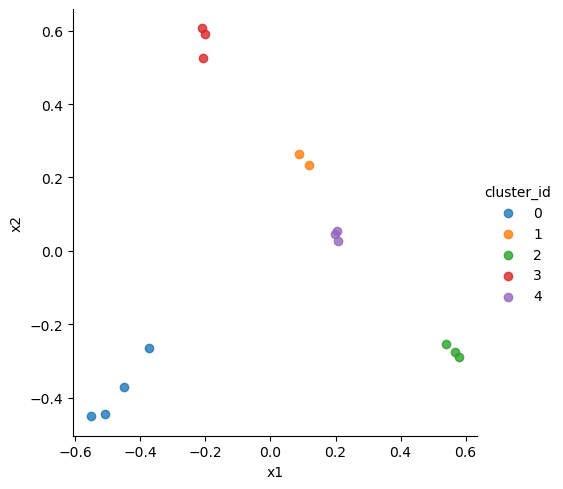

In [31]:
sns.lmplot(x='x1', y='x2', data=data, hue='cluster_id',fit_reg=False )
plt.show()